# Tagesmitteltemperaturen Zürich-Fluntern 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%autosave 0

Autosave disabled


## Link zu den Daten
https://www.ecad.eu/dailydata/customquery.php

In [16]:
df = pd.read_csv('TG_STAID000244.txt', header=14, index_col=1, parse_dates=True)
df.columns=['SOUID', 'TG', 'Q_TG']
df.head()

,SOUID,TG,Q_TG
DATE,,,
1901-01-01,100757,18,0
1901-01-02,100757,-12,0
1901-01-03,100757,-59,0
1901-01-04,100757,-89,0
1901-01-05,100757,-101,0


In [17]:
df.TG

    DATE
1901-01-01     18
1901-01-02    -12
1901-01-03    -59
1901-01-04    -89
1901-01-05   -101
             ... 
2021-11-26      3
2021-11-27     17
2021-11-28      7
2021-11-29     -3
2021-11-30      9
Name: TG, Length: 44164, dtype: int64

In [19]:
# Q_TG : Quality code for TG (0='valid'; 1='suspect'; 9='missing')
df.Q_TG.value_counts()

0    44164
Name: Q_TG, dtype: int64

In [22]:
df.drop(['SOUID', 'Q_TG'], axis=1, inplace=True)

In [23]:
df.head()

,TG
DATE,
1901-01-01,18
1901-01-02,-12
1901-01-03,-59
1901-01-04,-89
1901-01-05,-101


In [30]:
df.rename(columns={'TG': 'Celsius'}, inplace=True)

In [29]:
df.head()

,Celsius
DATE,
1901-01-01,18
1901-01-02,-12
1901-01-03,-59
1901-01-04,-89
1901-01-05,-101


In [31]:
df['Celsius'] = df.Celsius / 10
df.head()

,Celsius
DATE,
1901-01-01,1.8
1901-01-02,-1.2
1901-01-03,-5.9
1901-01-04,-8.9
1901-01-05,-10.1


In [32]:
df.describe()

,Celsius
count,44164.000000
mean,9.098121
std,7.499005
min,-20.400000
25%,3.200000
50%,9.300000
75%,15.200000
max,27.800000


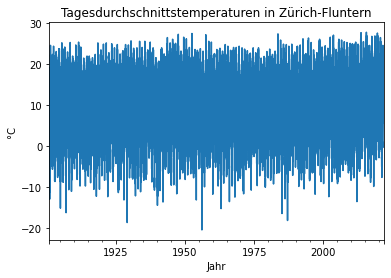

In [41]:
df.Celsius.plot(title='Tagesdurchschnittstemperaturen in Zürich-Fluntern', xlabel='Jahr', ylabel='°C');

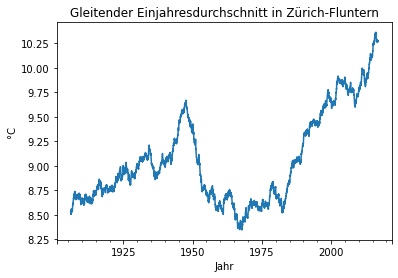

In [53]:
df.Celsius.rolling(3650, center=True).mean().plot(title='Gleitender Einjahresdurchschnitt in Zürich-Fluntern', xlabel='Jahr', ylabel='°C');

In [58]:
Monatsmittelwerte = df.Celsius.groupby(df.index.month).mean()

<AxesSubplot:xlabel='Monat', ylabel='Durchschnitts ° Celsius'>

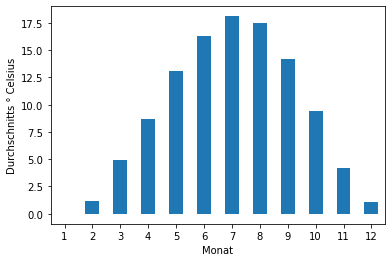

In [62]:
Monatsmittelwerte.plot(kind='bar', xlabel='Monat', ylabel='Durchschnitts ° Celsius', rot=0)

In [66]:
Monatsmittelwerte.index.month_name()

AttributeError: 'Int64Index' object has no attribute 'month_name'

## Nun versuchen wir eine ähnliche Grafik zu erstellen wie im SRF
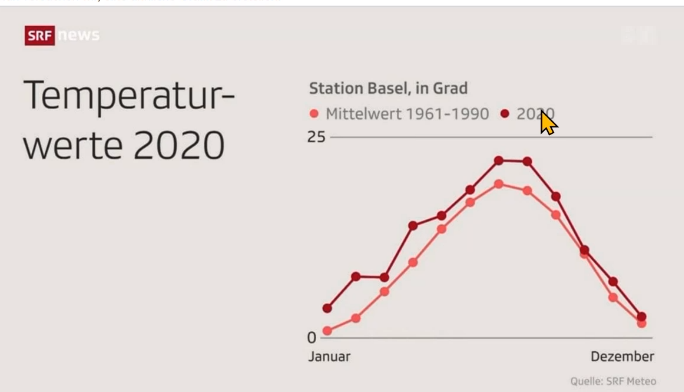

In [105]:
df_plot = df.pivot_table(values='Celsius', columns=df.index.month, index=df.index.year)

In [106]:
df_plot

DATE,1,2,3,4,5,6,7,8,9,10,11,12
DATE,,,,,,,,,,,,
1901,-1.864516,-4.146429,3.003226,8.956667,13.896774,16.776667,18.600000,16.548387,14.223333,8.600000,1.700000,1.041935
1902,1.203226,-0.025000,4.845161,10.710000,8.758065,15.313333,18.225806,16.619355,13.703333,8.416129,2.720000,-0.787097
1903,-0.570968,2.753571,6.122581,5.313333,13.216129,14.933333,16.606452,17.058065,14.163333,10.106452,4.276667,-0.964516
1904,-1.729032,1.924138,4.429032,10.360000,14.129032,16.993333,20.490323,18.654839,12.256667,9.054839,2.793333,1.351613
1905,-2.635484,1.353571,5.367742,8.653333,11.593548,17.083333,20.538710,17.251613,14.100000,4.474194,3.613333,0.225806
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,-2.767742,3.742857,8.512903,8.836667,14.754839,19.870000,19.219355,19.458065,13.093333,11.312903,4.786667,1.309677
2018,4.758065,-1.471429,3.764516,13.486667,15.364516,18.453333,21.167742,20.816129,16.436667,11.170968,5.350000,3.467742
2019,0.116129,3.889286,7.219355,9.326667,10.622581,19.620000,20.667742,18.935484,15.043333,11.641935,5.503333,3.790323


In [107]:
df_plot.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='    DATE')

In [108]:
ser1 = df_plot.loc['1901':'1920', :].mean()

In [109]:
ser2 = df_plot.loc['1951':'1970', :].mean()
ser3 = df_plot.loc['2001':'2020', :].mean()

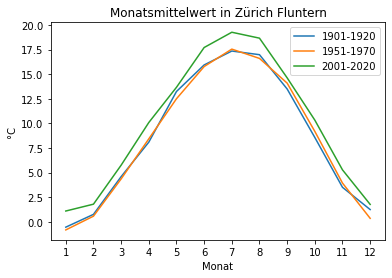

In [110]:
ser1.plot()
ser2.plot()
ser3.plot(title='Monatsmittelwert in Zürich Fluntern', xticks=range(1,13), xlabel='Monat', ylabel='°C')
plt.legend(['1901-1920', '1951-1970', '2001-2020']);